In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
df = pd.read_excel("avalanche_discrete_selected3.xlsx")
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
column_names = df.iloc[:,1:].columns
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=43, stratify=y)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
import xgboost as xgb
from ngboost import NGBClassifier

### Random Forest

In [3]:
RFC = RandomForestClassifier(random_state=42,n_estimators=200,criterion='gini', max_depth=50,
                            min_samples_split=10)
RFC.fit(X_train,y_train)
fi_df = pd.DataFrame({
    "feature_importances" : RFC.feature_importances_,
    "features" : column_names
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

fi_df

,feature_importances,features
0,0.423962,Elevation
12,0.253289,Land Use
1,0.085685,Slope
8,0.082356,Proximity to Road
10,0.046883,Annual Precipitation
2,0.028838,Aspect
11,0.023418,Lithology
5,0.016819,Topographic Wetness Index
6,0.012948,Terrain Roughness Index
4,0.007860,Profile Curvature


### Gradient Boosting

In [4]:
GB= GradientBoostingClassifier()
GB.fit(X_train,y_train)
fi_df = pd.DataFrame({
    "feature_importances" : GB.feature_importances_,
    "features" : column_names
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

fi_df

,feature_importances,features
0,0.841328,Elevation
1,0.046677,Slope
12,0.042658,Land Use
10,0.027952,Annual Precipitation
8,0.015953,Proximity to Road
2,0.007023,Aspect
5,0.004975,Topographic Wetness Index
11,0.004206,Lithology
6,0.003560,Terrain Roughness Index
3,0.002766,Plan Curvature


### AdaBoost

In [5]:
from sklearn.ensemble import AdaBoostClassifier
AB= AdaBoostClassifier(n_estimators=100, learning_rate=1,algorithm='SAMME.R')
AB.fit(X_train,y_train)
fi_df = pd.DataFrame({
    "feature_importances" : AB.feature_importances_,
    "features" : column_names
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

fi_df

,feature_importances,features
0,0.16,Elevation
10,0.16,Annual Precipitation
12,0.14,Land Use
1,0.09,Slope
4,0.06,Profile Curvature
5,0.06,Topographic Wetness Index
8,0.06,Proximity to Road
2,0.05,Aspect
3,0.05,Plan Curvature
7,0.05,Topographic Position Index


### XGBoost

In [6]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train,y_train)
fi_df = pd.DataFrame({
    "feature_importances" : XGB.feature_importances_,
    "features" : column_names
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

fi_df

C:\Users\muzaf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,feature_importances,features
0,0.724242,Elevation
1,0.039896,Slope
12,0.039446,Land Use
8,0.027316,Proximity to Road
6,0.025141,Terrain Roughness Index
10,0.023682,Annual Precipitation
5,0.019280,Topographic Wetness Index
11,0.018333,Lithology
2,0.017971,Aspect
3,0.017963,Plan Curvature


### LightGBM

In [7]:
import lightgbm as lgb
LGB = lgb.LGBMClassifier()
LGB.fit(X_train,y_train)
fi_df = pd.DataFrame({
    "feature_importances" : LGB.feature_importances_,
    "features" : column_names
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)


scalar = 3000
fi_df['feature_importances'] = (fi_df['feature_importances'] / scalar)
fi_df

,feature_importances,features
2,0.189667,Aspect
10,0.164333,Annual Precipitation
1,0.104000,Slope
11,0.099000,Lithology
12,0.089000,Land Use
0,0.085000,Elevation
5,0.071333,Topographic Wetness Index
8,0.053667,Proximity to Road
4,0.039000,Profile Curvature
6,0.032333,Terrain Roughness Index


### NGBoost

In [8]:
from ngboost import NGBClassifier
NGB = NGBClassifier()
NGB.fit(X_train,y_train)

[iter 0] loss=0.6931 val_loss=0.0000 scale=8.0000 norm=16.0000
[iter 100] loss=0.2390 val_loss=0.0000 scale=2.0000 norm=3.0621
[iter 200] loss=0.2223 val_loss=0.0000 scale=1.0000 norm=1.5908
[iter 300] loss=0.2159 val_loss=0.0000 scale=0.5000 norm=0.8107
[iter 400] loss=0.2139 val_loss=0.0000 scale=0.2500 norm=0.4079


NGBClassifier(random_state=RandomState(MT19937) at 0x26776F19A40)

In [9]:
fi_df = pd.DataFrame({
    "feature_importances" : NGB.feature_importances_[0],
    "features" : column_names
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

fi_df 

,feature_importances,features
0,0.759867,Elevation
1,0.086682,Slope
12,0.051157,Land Use
10,0.042012,Annual Precipitation
7,0.012558,Topographic Position Index
8,0.012013,Proximity to Road
11,0.011169,Lithology
6,0.007911,Terrain Roughness Index
5,0.007306,Topographic Wetness Index
3,0.006062,Plan Curvature


## SHAPLEY

In [10]:
import shap
shap.initjs()

### Random Forest

In [11]:
explainer = shap.TreeExplainer(RFC)
shap_values = explainer.shap_values(X_test)

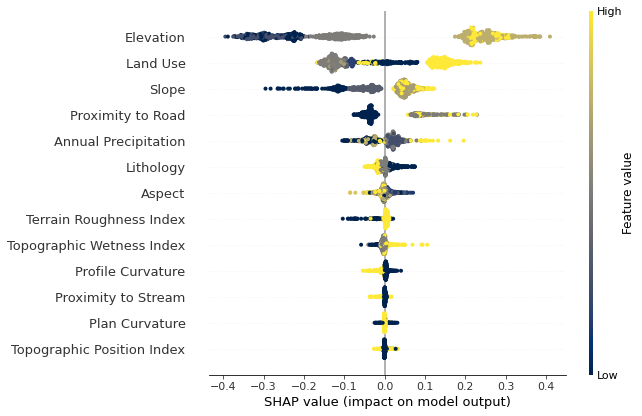

In [12]:
fig = plt.figure(figsize=(6, 6))
my_cmap = plt.get_cmap('cividis')
shap.summary_plot(shap_values[1], features=X_test, feature_names=column_names, show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)
fig.savefig('shap_RF.png', dpi=400,bbox_inches='tight')

### Gradient Boosting

In [13]:
explainer_GB = shap.TreeExplainer(GB)
shap_values_GB = explainer_GB.shap_values(X_test)

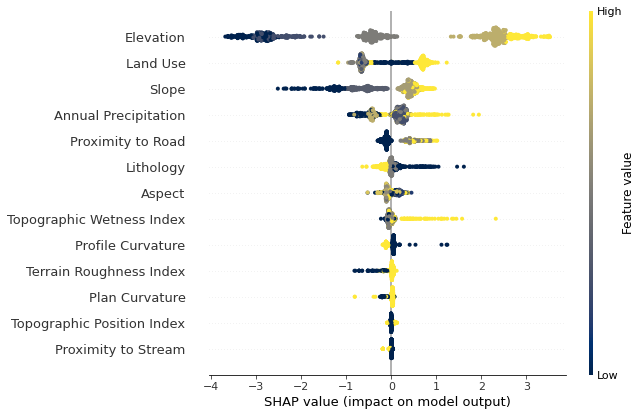

In [14]:
fig = plt.figure(figsize=(6, 6))
my_cmap = plt.get_cmap('cividis')
shap.summary_plot(shap_values_GB, features=X_test, class_inds=[1], feature_names=column_names, show=False )
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)
fig.savefig('shap_GB.png', dpi=400,bbox_inches='tight')

### XGBoost

In [15]:
explainer_XGB = shap.TreeExplainer(XGB)
shap_values_XGB = explainer_XGB.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


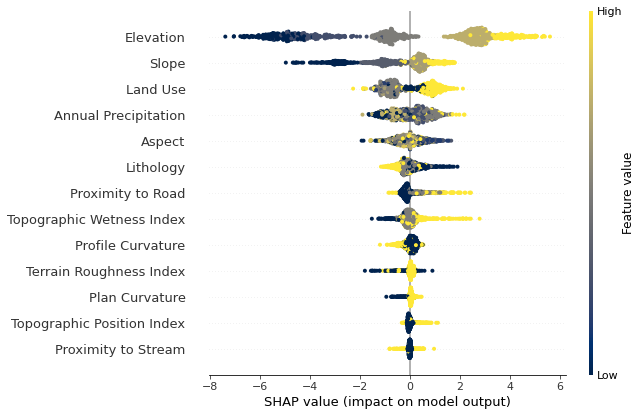

In [16]:
fig = plt.figure(figsize=(6, 6))
my_cmap = plt.get_cmap('cividis')
shap.summary_plot(shap_values_XGB, features=X_test, class_inds=[1], feature_names=column_names, show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)
fig.savefig('shap_XGB.png', dpi=400,bbox_inches='tight')

### AdaBoost

In [20]:
explainer_AB = shap.TreeExplainer(model)
shap_values_AB = explainer_AB.shap_values(X_test)

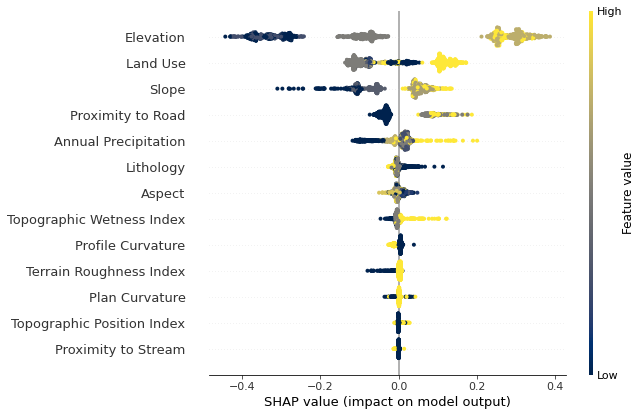

In [21]:
fig = plt.figure(figsize=(6, 6))
my_cmap = plt.get_cmap('cividis')
shap.summary_plot(shap_values_AB, X_test, feature_names=column_names, show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)
fig.savefig('shap_AB.png', dpi=400,bbox_inches='tight')

### LightGBM

In [23]:
explainer_LGB = shap.TreeExplainer(model2)
shap_values_LGB = explainer_LGB.shap_values(X_test)

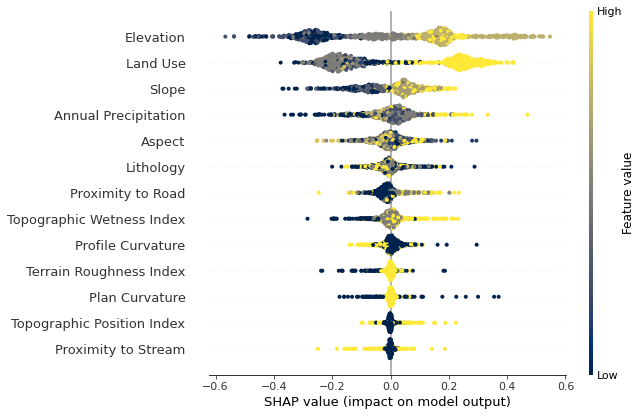

In [24]:
fig = plt.figure(figsize=(6, 6))
my_cmap = plt.get_cmap('cividis')
shap.summary_plot(shap_values_LGB, X_test, feature_names=column_names, show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)
fig.savefig('shap_LGB.png', dpi=400,bbox_inches='tight')

### NGBoost

In [25]:
explainer_NGB = shap.TreeExplainer(NGB, model_output=0)
shap_values_NGB = explainer_NGB.shap_values(X_test)

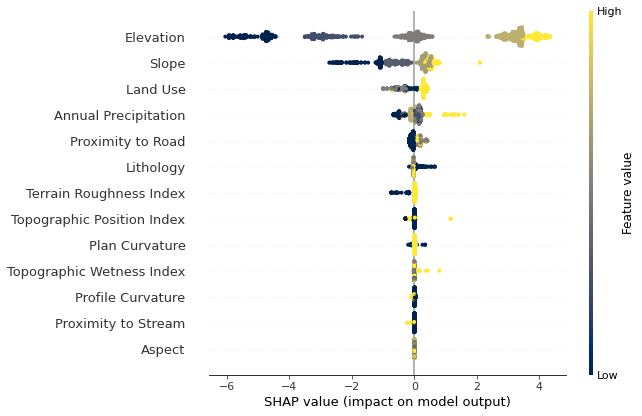

In [26]:
fig = plt.figure(figsize=(6, 6))
my_cmap = plt.get_cmap('cividis')
shap.summary_plot(shap_values_NGB, X_test, feature_names=column_names, show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)
fig.savefig('shap_NGB.png', dpi=400,bbox_inches='tight')